# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
data.shape

(414, 7)

# Preparation of data
1. Missing values
2. Types mismatch
3. Outliers
4. Duplicates Records


In [3]:
# let us save the columns name in a list
col = data.columns.tolist()
col

['transaction_date',
 'house_age',
 'transit_distance',
 'local_convenience_stores',
 'latitude',
 'longitude',
 'price_per_unit']

In [4]:
# it is supervised learning , we know the target value, it is price_per_unit so let us seperate the col
features = col[:-1]
label = col[-1]
features, label

(['transaction_date',
  'house_age',
  'transit_distance',
  'local_convenience_stores',
  'latitude',
  'longitude'],
 'price_per_unit')

## 1. Missing Values and Errors

In [5]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

## 2. Type mismatch

In [6]:
# what are the types and names of each columns
data.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

>- We have only numerical variable this is not really true , because of the transaction_date which is a date time

In [7]:
# let us see the counts of dates 
counts = data.transaction_date.value_counts().sort_index(ascending=True) 
counts

2012.667    30
2012.750    27
2012.833    31
2012.917    38
2013.000    28
2013.083    46
2013.167    25
2013.250    32
2013.333    29
2013.417    58
2013.500    47
2013.583    23
Name: transaction_date, dtype: int64

In [8]:
# Let us see the difference between each dates
[round(elt2 - elt1, 3) for elt1, elt2 in zip(counts.index, counts.index[1:])]

[0.083, 0.083, 0.084, 0.083, 0.083, 0.084, 0.083, 0.083, 0.084, 0.083, 0.083]

>- We clearing see that the difference between two consecutiv month is 0.083
>- Then if 2013.250 is 2013 March we can find the remaining dates by using that difference

In [9]:
# This will help us get the month from each dates
def retrieve_month(dates):
    month = 0
    if str(dates)[4:7] == '.25' :
        month = '03'
    elif str(dates)[4:7] == '.33' :
        month = '04'
    elif str(dates)[4:7] == '.41' :
        month = '05'
    elif str(dates)[4:6] == '.5' and len(str(dates)) == 6:
        month = '06'
    elif str(dates)[4:7] == '.58' :
        month = '07'
    elif str(dates)[4:7] == '.66' :
        month = '08'
    elif str(dates)[4:7] == '.75' :
        month = '09'
    elif str(dates)[4:7] == '.83' :
        month = '10'
    elif str(dates)[4:7] == '.91' :
        month = '11'
    elif str(dates)[4:6] == '.0' and len(str(dates)) == 6:
        month = '12'
    elif str(dates)[4:7] == '.08' :
        month = '01'
    elif str(dates)[4:7] == '.16' :
        month = '02'
    return month




In [10]:
months = data.transaction_date.apply(retrieve_month)
year = data.transaction_date.apply(lambda x: str(x)[:4])
data["TD_months"]=months
data["TD_year"] = year
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,TD_months,TD_year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,07,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,06,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012


## 3. Outliers

In [43]:
data.plot

In [48]:
# This function draw the different type of average and the min max value of a distribution
def draw_type_avg(var_data):
    plt.axvline(var_data.min(), color = "black", linestyle = "--")
    plt.axvline(var_data.mean(), color = "red", linestyle = "--")
    plt.axvline(var_data.median(), color = "green", linestyle = "--")
    plt.axvline(var_data.mode()[0], color = "yellow", linestyle = "--")
    plt.axvline(var_data.max(), color = "black", linestyle = "--")
    
# This function drax the boxplot and the histogram of a variable
def draw_distr(var_data):
    fig = plt.figure()

    data.hist(var_data)
    draw_type_avg(data.price_per_unit)
    data.plot.box(var_data, vert = False)
    plt.xticks(rotation=90)



<Figure size 432x288 with 0 Axes>

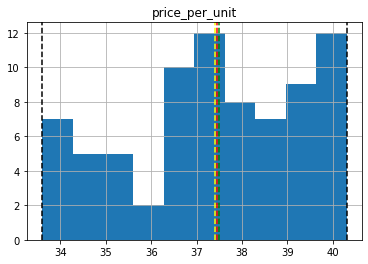

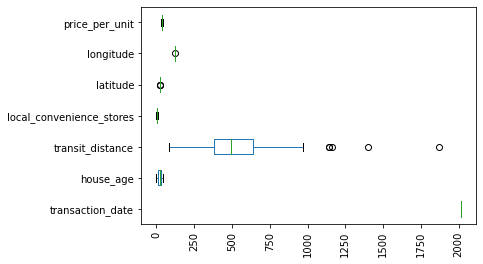

In [49]:
import matplotlib.pyplot as plt

draw_distr(label)


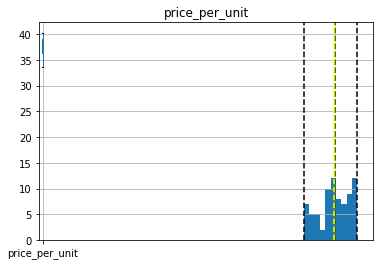

In [33]:

# We remove outliers , value above quantile 15% and below 85%
data = data[data.price_per_unit < data.price_per_unit.quantile(0.85)]
data = data[data.price_per_unit > data.price_per_unit.quantile(0.15)]

# Let us visualise the result
draw_distr(label)
draw_type_avg(data.price_per_unit)

The visualisation shows that the price per unit ranges from around 16 to 64 but most of value.
- The mean, median and mode are close to the center of the ranges (16, 64)
- Most values of the price are between 35 just above 39

## 4. Duplicate records

In [13]:
data.shape

(414, 9)

In [14]:
data.drop_duplicates(inplace=True)
data.shape

(414, 9)

# Exploratory Data Analysis

In [15]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [16]:
# Your code to explore data and train a regression model

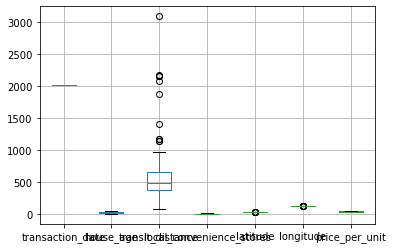

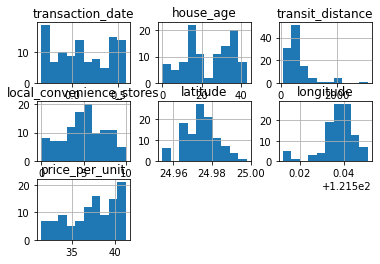

In [30]:
draw_distr(col)

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [17]:
# Your code to use the trained model